# KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.tools.plotting
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
"""
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 
"""

'\n1. Number of times pregnant \n2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test \n3. Diastolic blood pressure (mm Hg) \n4. Triceps skin fold thickness (mm) \n5. 2-Hour serum insulin (mu U/ml) \n6. Body mass index (weight in kg/(height in m)^2) \n7. Diabetes pedigree function \n8. Age (years) \n9. Class variable (0 or 1) \n'

In [3]:
# when do I use df = pd.DataFrame.from_csv (   )

headers=[
    '#_pregnants',
    'plasma',
    'b_press',
    'triceps',
    'insulin',
    'bmi',
    'diab-ped-func',
    'age',
    'class_var'
    ]
    
subjects = pd.read_csv("pima-indians-diabetes.data", names=headers)
    
subjects.head()

,#_pregnants,plasma,b_press,triceps,insulin,bmi,diab-ped-func,age,class_var
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
subjects.describe()

,#_pregnants,plasma,b_press,triceps,insulin,bmi,diab-ped-func,age,class_var
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
subjects[subjects.class_var==1].count()
subjects[subjects.class_var==0].count()

#_pregnants      500
plasma           500
b_press          500
triceps          500
insulin          500
bmi              500
diab-ped-func    500
age              500
class_var        500
dtype: int64

In [6]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
#_pregnants      768 non-null int64
plasma           768 non-null int64
b_press          768 non-null int64
triceps          768 non-null int64
insulin          768 non-null int64
bmi              768 non-null float64
diab-ped-func    768 non-null float64
age              768 non-null int64
class_var        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


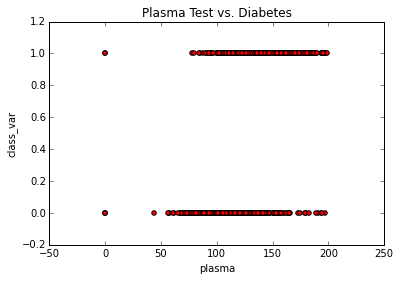

In [7]:
#subjects.plot(kind="scatter",x='plasma',y='class_var' ,c='r', title="Plasma Test vs. Diabetes") 
subjects.plot(kind="scatter",x=1,y=8 ,c='r', title="Plasma Test vs. Diabetes") 

# for some reason here I cannot see that the plasma values would be any clear indicator of diabetes or not. 
# possibly I am misunderstanding this piece of information


In [8]:
subjects.columns

Index([u'#_pregnants', u'plasma', u'b_press', u'triceps', u'insulin', u'bmi',
       u'diab-ped-func', u'age', u'class_var'],
      dtype='object')

In [9]:
from numpy import genfromtxt
my_data = genfromtxt('pima-indians-diabetes.data', delimiter=',')

In [10]:
X = my_data[:, 0:8]
y = my_data[:,8]


In [11]:
a=  len(X)

ind = range(a)

np.random.shuffle(ind) #Here I am randomly shuffling the index
train_ind = ind[a/5:] #Splitting off 4/5 of the data for training
test_ind = ind[:a/5] #Splitting off 1/5 of the data for testing

print len(test_ind)
print len(train_ind)
print len(test_ind) + len(train_ind)


153
615
768


In [12]:
# Here I am recreating two datasets using the shuffled indexes

X_train = list() #For training list of data
y_train = list() #For training list of targets

X_test = list() #For test list of data
y_test = list() #For test list of targets

for ind in train_ind:
    X_train.append(X[ind])
    y_train.append(y[ind])   # There must be a better way to get this data in
    
for ind in test_ind: 
    X_test.append(X[ind])
    y_test.append(y[ind])
    

print "X_train rows: " + str(len(X_train))
print "y_train_rows: " + str(len(y_train))
print "X_test rows: " + str(len(X_test))
print "y_test rows: " + str(len(y_test))

X_train rows: 615
y_train_rows: 615
X_test rows: 153
y_test rows: 153


In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=153)
# In the above example the test size is 0. Instead, so there I would probably want to put 153

In [14]:
#X_train.shape

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Did not do this correctly, and just added this part in before class. Did not read in the homework that 0,50 nearest
# neighbors needed to be done. 
#Also, I did not normalize :-/ 

score = []

sum_score = 0

for x in range(1,50):
#for x in range(0,50)
    myknn = KNeighborsClassifier(x).fit(X_train,y_train) # Here I create a model called myknn
    prediction = myknn.predict(X_test) #these are my predicted values for y_test

    yay_score = 0 

    for a,b in zip(y_test, prediction): 
        if a == b: 
            yay_score += 1
        else: 
            pass
    score.append(float(yay_score)/len(y_test))
    #print score
    print "Score: ", float(yay_score)/len(y_test)
    
    

[0.7189542483660131]
Score:  0.718954248366
[0.7189542483660131, 0.6797385620915033]
Score:  0.679738562092
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934]
Score:  0.640522875817
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934, 0.6862745098039216]
Score:  0.686274509804
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934, 0.6862745098039216, 0.6797385620915033]
Score:  0.679738562092
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934, 0.6862745098039216, 0.6797385620915033, 0.6797385620915033]
Score:  0.679738562092
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934, 0.6862745098039216, 0.6797385620915033, 0.6797385620915033, 0.6928104575163399]
Score:  0.692810457516
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934, 0.6862745098039216, 0.6797385620915033, 0.6797385620915033, 0.6928104575163399, 0.7320261437908496]
Score:  0.732026143791
[0.7189542483660131, 0.6797385620915033, 0.6405228758169934, 0.6862745098039216, 0.67973

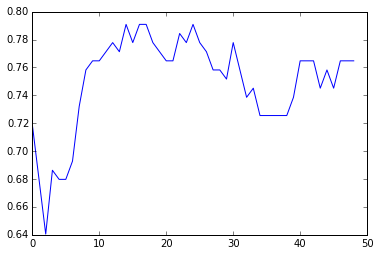

In [38]:
#plotting the scores 

import matplotlib.pyplot as plt


plt.plot(score)
plt.show()


In [18]:
myknn = KNeighborsClassifier(2).fit(X_train,y_train) # Here I create a model called myknn

In [19]:
print len(X_test)

153


In [20]:
prediction = myknn.predict(X_test) #these are my predicted values for y_test
prediction

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [20]:
yay_score = 0 

for a,b in zip(y_test, prediction): 
    if a == b: 
        yay_score += 1
    else: 
        pass

In [21]:
print "Number correct: ", yay_score
print "Total rows: ", len(y_test)
print "Score: ", float(yay_score)/len(y_test)

Number correct:  107
Total rows:  153
Score:  0.699346405229


In [22]:
headers=[
    '#_pregnants',
    'plasma',
    'b_press',
    'triceps',
    'insulin',
    'bmi',
    'diab-ped-func',
    'age',
    'class_var'
    ]
    
subjects = pd.read_csv("pima-indians-diabetes.data", names=headers)


features= headers[0:8]
to_predict = headers[8]

data = subjects[features]
label = subjects[to_predict] # Why do we call this label? 
folds=5

model = KNeighborsClassifier(10)



In [23]:
def cross_validate_df(data,label,model,k):
    train_slices = []
    test_slices = []
    positions = data.index.values

    # Remember this technique? We're going to 
    # shuffle our data in place using NumPy
    np.random.shuffle(positions)

    for i in range(k):

        # When creating and evaluating a loop, it's important to understand
        # the loop at 3 points: 
        # initial iteration (i = 0)
        # steady state (0 < i < end) assuming it's running smoothly
        # exit (i = end)

        section_start = i*len(data)/k
        section_end = (i+1)*len(data)/k
        test_slices.append(positions[ section_start:section_end ])

        # We now want the rest of the data, slicing up to the start
        # and combining that with a slice from the test slice end to
        # the end of the dataframe

        train_p1 = positions[ :section_start ]
        train_p2 = positions[ section_end: ]
        train_combo = np.concatenate([train_p1,train_p2])
        train_slices.append(train_combo)

    scores = 0

    for train_sl, test_sl in zip(train_slices,test_slices):

        model.fit(data.loc[train_sl],label.loc[train_sl])
        k_score = model.score(data.loc[test_sl],label.loc[test_sl])
        scores += k_score
        print k_score
    return scores/k




# Use this code for cross validation in the future
# It's more efficient

def crossValidateScoreDataFrame(data,label,k,model):
    positions = data.index.values
    np.random.shuffle(positions)
    cv_score=0

    for i in range(k):
        pos_var = len(data)/k
        
        test_slice = positions[i*pos_var:(i+1)*pos_var]

        train_1 = positions[ :i*pos_var]
        train_2 = positions[(i+1)*pos_var:]
        train_slice = np.concatenate([train_1,train_2])

        model.fit(data.loc[train_slice],label.loc[train_slice])
        k_score = model.score(data.loc[test_slice],label.loc[test_slice])
        cv_score += k_score
        print k_score
        
    return  cv_score/k



In [24]:
cross_validate_df(data,label,model,5)

0.751633986928
0.668831168831
0.764705882353
0.824675324675
0.707792207792


0.74352771411594942

In [29]:
# help(cross_val_score) Need to look further. 


from sklearn.cross_validation import cross_val_score

n_samples = len(y)

test_scores = cross_val_score(model, X, y)
test_scores.mean()

#print test_scores


0.73694606571552101

## Naive Bayes

In [276]:
#Doing the same thing, but using the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=153)

In [279]:
print X_train.shape
print X_train

(615, 8)
[[   2.     106.      64.    ...,   30.5      1.4     34.   ]
 [   1.     118.      58.    ...,   33.3      0.261   23.   ]
 [   7.     196.      90.    ...,   39.8      0.451   41.   ]
 ..., 
 [   7.     133.      88.    ...,   32.4      0.262   37.   ]
 [   4.     134.      72.    ...,   23.8      0.277   60.   ]
 [   0.     146.      82.    ...,   40.5      1.781   44.   ]]


In [280]:
X_test.shape

(153, 8)

In [281]:
type(X_test)

numpy.ndarray

In [289]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [291]:
preds = nb.predict(X_test)

In [292]:
preds

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.])

In [294]:
from sklearn import metrics
print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

0.562091503268
[[57 38]
 [29 29]]
